In [8]:
ks = [4,5,6,7,8]
root = "/media/mydrive/CDMA"

import json, os
import numpy as np

filename = os.path.join(root, "result/phase/k{}_d{}_id{}.json")
xs = np.arange(6000, 8001, 100)
ys = np.zeros((len(ks), len(xs)), dtype=np.float32)
times = np.zeros_like(ys)

for ki, k in enumerate(ks):
  for i, x in enumerate(xs):
      for idx in range(1000):
          file = filename.format(k, x, idx)
          with open(file, "r") as f:
              data = json.load(f)
          if data["success"]:
              ys[ki, i] += 1
              times[ki, i] += data["time"]
times = np.divide(times, ys)
ys /= 1000
xs, ys

/tmp/ipykernel_405564/186535325.py:21: RuntimeWarning: invalid value encountered in divide
  times = np.divide(times, ys)


(array([6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000,
        7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000]),
 array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.004, 0.017, 0.022],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.001, 0.003, 0.017, 0.034, 0.099, 0.13 , 0.197,
         0.266, 0.288, 0.347],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.004,
         0.025, 0.049, 0.083, 0.188, 0.291, 0.39 , 0.497, 0.597, 0.707,
         0.766, 0.829, 0.866],
        [0.   , 0.   , 0.   , 0.   , 0.001, 0.01 , 0.042, 0.119, 0.272,
         0.446, 0.583, 0.692, 0.776, 0.849, 0.889, 0.927, 0.937, 0.957,
         0.959, 0.982, 0.987],
        [0.   , 0.   , 0.   , 0.009, 0.058, 0.138, 0.322, 0.5  , 0.685,
         0.801, 0.902, 0.948, 0.974, 0.977, 0.995, 0.997, 0.995, 0.996,
         0.9

In [9]:
ks = [7]

filename = os.path.join(root, "result/countmin/peel_k{}_d{}_id{}.json")
xs = np.arange(6000, 8001, 100)
ys_cm = np.zeros((len(ks), len(xs)), dtype=np.float32)
times_cm = np.zeros_like(ys)

for ki, k in enumerate(ks):
  for i, x in enumerate(xs):
      for idx in range(1000):
          file = filename.format(k, x, idx)
          with open(file, "r") as f:
              data = json.load(f)
          if data["success"]:
              ys_cm[ki, i] += 1
              times_cm[ki, i] += data["time"]
times_cm = np.divide(times_cm, ys_cm)
ys_cm /= 1000
ys_cm

/tmp/ipykernel_405564/1370640555.py:17: RuntimeWarning: invalid value encountered in divide
  times_cm = np.divide(times_cm, ys_cm)


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.005, 0.019, 0.082, 0.26 , 0.454, 0.708, 0.864,
        0.929, 0.963, 0.981]], dtype=float32)

IndexError: list index out of range

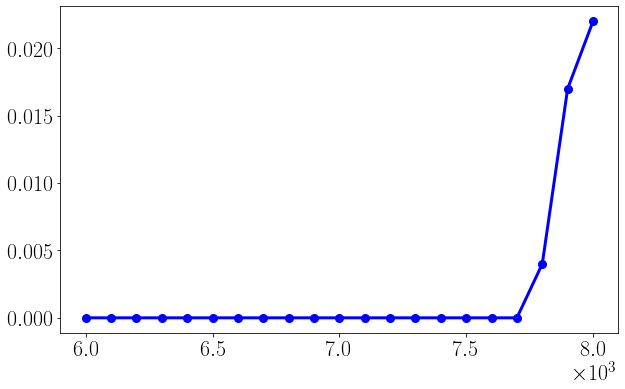

In [10]:
from oniakPlot import line_plot

data = [(xs, yline) for yline in ys]
labels = ["k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Success Rate", 
                      "Phase Success Rate", "phase_success_8.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Phase Success Rate'}, xlabel='Sketch Size (\\# Counters)', ylabel='Success Rate'>

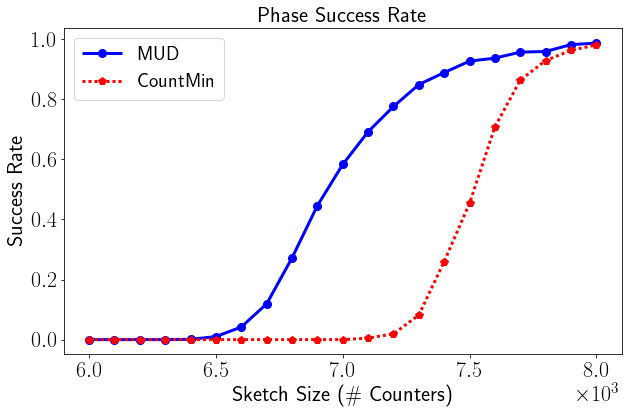

In [ ]:

data = [(xs, ys[3]), (xs, ys_cm[0])]
labels = ["MUD, k=7", "CountMin, k=7"]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Success Rate", 
                      "Phase Success Rate", "phase_success_cm.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Average Time When Succeed'}, xlabel='Sketch Size (\\# Counters)', ylabel='Time (s)'>

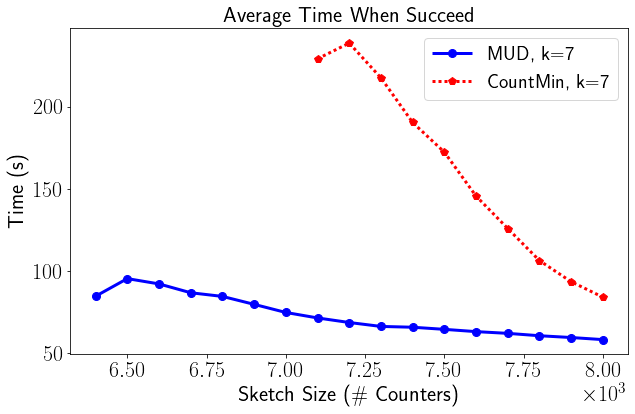

In [11]:
data = [(xs, times[3]), (xs, times_cm[0])]
labels = ["MUD, k=7", "CountMin, k=7"]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Time (s)", "Average Time When Succeed", "success_times_cm.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Phase Success Rate'}, xlabel='Sketch Size (\\# Counters)', ylabel='Time (s)'>

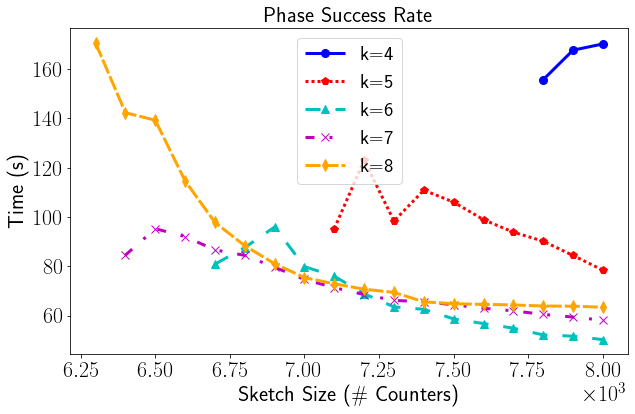

In [ ]:
data = [(xs, tline) for tline in times]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Time (s)", "Average Time When Succeed", "success_times.pdf",
                      figsize=(10, 6))